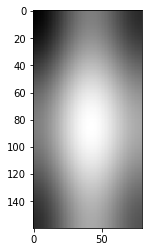

In [46]:
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
from scipy.misc import imresize, imread, imsave
import numpy as np
import cv2
import matplotlib.pyplot as plt


def gkern2(kernlenx=21, kernleny=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    # create nxn zeros
    inp = np.zeros((kernlenx, kernleny))
    # set element at the middle to one, a dirac delta
    inp[kernlenx//2, kernleny//2] = 1
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return gaussian_filter(inp, nsig)

g_2d = gkern2(160, 160, 80)
plt.imshow(g_2d, interpolation='none')
g_2d = imresize(g_2d, (160, 80))
g_2d = np.stack((g_2d, g_2d, g_2d), 2)
plt.imshow(g_2d, interpolation='none')

# box_2d = np.zeros((160,80))
# box_2d[20:140, 10:70] = 1
# box_2d = np.stack((box_2d, box_2d, box_2d), 2)
# plt.imshow(box_2d, interpolation='none')

In [14]:
# import os
# img_dir = 'clip_imgs'
# hist_vec = None
# imgs = None

# for i,f in enumerate(os.listdir(img_dir)):
#     img = imread(os.path.join(img_dir, f), mode='RGB')
#     if imgs is None:
#         imgs = np.expand_dims(img, 0)
#     else:
#         imgs = np.vstack((imgs, np.expand_dims(img,0)))
#     c_hist_vec = None
# #     img = img*box_2d
#     img = img*g_2d
#     for c in range(3):
#         hist, _ = np.histogram(img[:,:,c].ravel(), bins=10)
#         hist = hist.astype(float)
        
#         if c_hist_vec is None:
#             c_hist_vec = hist
#         else:
#             c_hist_vec = np.vstack((c_hist_vec, hist))
# #         (hist,_,_) = plt.hist(img[:,:,c].ravel(), bins=10, weights=g_2d[:,:,c].ravel())
# #         print(hist)
# #         plt.show()
#     c_hist_vec = c_hist_vec.reshape(1, -1)
#     if hist_vec is None:
#         hist_vec = c_hist_vec
#     else:
#         hist_vec = np.vstack((hist_vec, c_hist_vec))

        
# print(hist_vec.shape)

(395, 30)


In [47]:
import os
from matplotlib.colors import rgb_to_hsv
img_dir = 'clip_imgs'
hist_vec = None
imgs = None

for i,f in enumerate(os.listdir(img_dir)):
    img = imread(os.path.join(img_dir, f), mode='RGB')
    if imgs is None:
        imgs = np.expand_dims(img, 0)
    else:
        imgs = np.vstack((imgs, np.expand_dims(img,0)))
    c_hist_vec = None

    img = rgb_to_hsv(img/255)
#     img = img*box_2d
#     print(img)
    img = img*g_2d
    for c in range(2):
        hist, _ = np.histogram(img[:,:,c].ravel(), bins=10)
        hist = hist.astype(float)
        
        if c_hist_vec is None:
            c_hist_vec = hist
        else:
            c_hist_vec = np.vstack((c_hist_vec, hist))
#         (hist,_,_) = plt.hist(img[:,:,c].ravel(), bins=10)
#         print(hist)
#         plt.show()
    c_hist_vec = c_hist_vec.reshape(1, -1)
    if hist_vec is None:
        hist_vec = c_hist_vec
    else:
        hist_vec = np.vstack((hist_vec, c_hist_vec))

        
print(hist_vec.shape)

(395, 20)


In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=-1, verbose=1)
k_result = kmeans.fit(hist_vec)

Initialization complete
Initialization complete
Initialization complete
start iteration
start iteration
Initialization complete
done sorting
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 0, inertia 1574887890.05
end inner loop
Iteration 0, inertia 1729777237.12
start iteration
Iteration 0, inertia 1565354840.81
start iteration
done sorting
Iteration 0, inertia 1546724767.25
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
done sorting
Iteration 1, inertia 1499406748.32
end inner loop
end inner loop
Iteration 1, inertia 1534437967.32
start iteration
Iteration 1, inertia 1507517887.49
start iteration
start iteration
done sorting
Iteration 1, inertia 1490405985.11
done sorting
done sorting
start iteration
end inner loop
end inner loop
end inner loop
done sorting
Iteration 2, inertia 1482792827.41
Iteration 2, inertia 1478552846.28
Iteration 2, inertia 1491028928.39
end in

done sorting
end inner loop
end inner loop
done sorting
Iteration 1, inertia 1565591417.93
Iteration 9, inertia 1440499185.0
end inner loop
start iteration
start iteration
Iteration 5, inertia 1461957227.93
done sorting
end inner loop
start iteration
done sorting
done sorting
Iteration 2, inertia 1497560430.43
end inner loop
Iteration 10, inertia 1439036821.55
start iteration
end inner loop
done sorting
start iteration
end inner loop
Iteration 6, inertia 1453736411.09
done sorting
end inner loop
Iteration 3, inertia 1452776299.51
start iteration
Iteration 11, inertia 1438809766.4
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 7, inertia 1442201116.16
end inner loop
Iteration 4, inertia 1441804093.89
Iteration 12, inertia 1438525732.23
start iteration
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 5, inertia 1437101741.11
Iteration 8, inertia 143

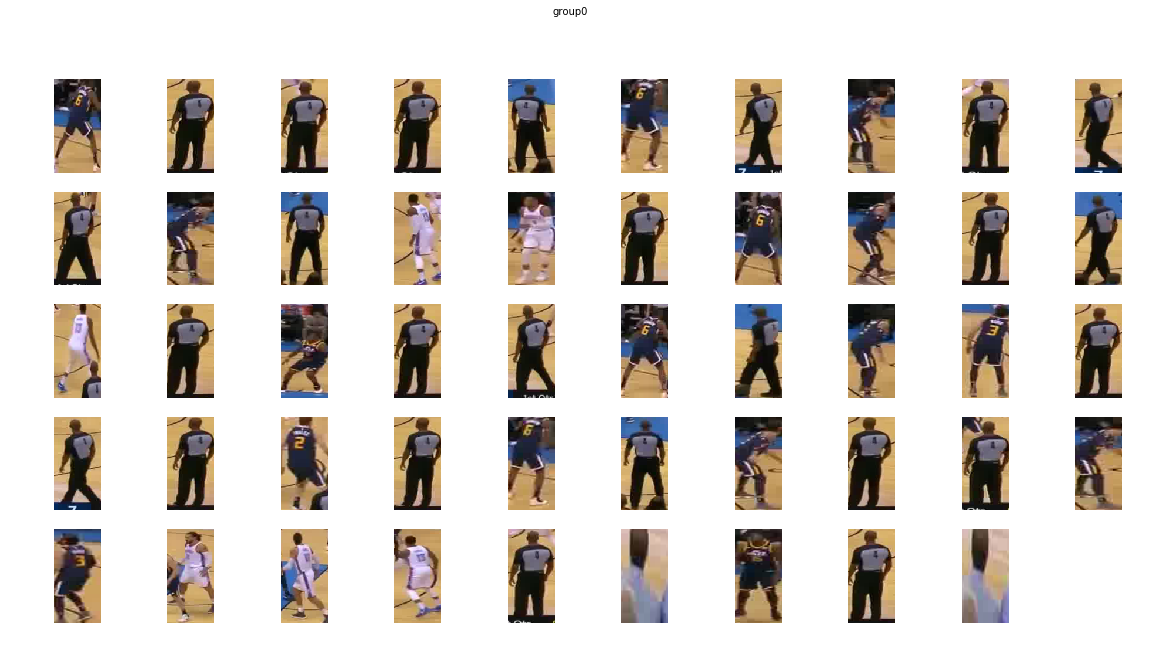

In [52]:
group = k_result.predict(hist_vec)

fig = plt.figure(figsize=(20,10))
plt.suptitle('group0', fontsize=10)
plt.axis('off')
k = 1
for i, g in enumerate(group):
    if g == 0:
        fig.add_subplot(5, 10, k)
        k = k + 1
        plt.axis('off')
        plt.imshow(imgs[i])
    if k == 50:
        break
plt.savefig('filter3_group0.jpg')